# Análise de dados dos casos de COVID-19 no estado do Rio Grande do Sul
O principal objetivo dessa pesquisa é extrair informações úteis a partir dos dados obtidos. A partir destas informações, é possível fazer uma predição da probabilidade de ocorrência do vírus no estado, dessa forma, podemos tomar decisões mais assertivas e orientadas para lidar com os resultados. Utilizaremos técnicas de aprendizado de máquina para realizar as predições, técnicas estatísticas para visualizar os dados e lógicas para formar uma conclusão. 

**Os dados da prevalência da COVID19 no estado do RS/Brasil foram retirados do SES/RS, são livremente disponibilizados, e se encontram em:** https://www.kaggle.com/datasets/paulopilotti/covid-rs-09112010

## Importando bibliotecas

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Adicionando o dataset

In [96]:
arquivo = 'drive/MyDrive/COVID_RS/20200911.csv'
df = pd.read_csv(arquivo, sep = ";", encoding='cp1252')
df

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_EVOLUCAO,...,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,HOSPITALIZACAO_SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,30 a 39,TESTE RÁPIDO,03/08/20,25/07/20,NaN,...,NaN,08/08/20,BRANCA,NAO ENCONTRADO,NAO,INTERIOR,NAO,E-SUS,BRASIL,NAO
1,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,30 a 39,TESTE RÁPIDO,30/07/20,26/07/20,NaN,...,NaN,09/08/20,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
2,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,20 a 29,TESTE RÁPIDO,26/06/20,26/06/20,NaN,...,NaN,10/07/20,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
3,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Masculino,20 a 29,TESTE RÁPIDO,26/06/20,25/06/20,NaN,...,NaN,09/07/20,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
4,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,60 a 69,TESTE RÁPIDO,07/08/20,29/07/20,NaN,...,NaN,12/08/20,BRANCA,NAO ENCONTRADO,NAO,INTERIOR,NAO,E-SUS,BRASIL,NAO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153470,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,20 a 29,TESTE RÁPIDO,14/07/20,10/07/20,NaN,...,NaN,24/07/20,PRETA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
153471,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,40 a 49,TESTE RÁPIDO,24/07/20,01/07/20,NaN,...,NaN,15/07/20,BRANCA,NAO ENCONTRADO,NAO,FIGUEIRINHA,NAO,E-SUS,BRASIL,NAO
153472,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,20 a 29,RT-PCR,09/06/20,07/06/20,NaN,...,NaN,21/06/20,AMARELA,NAO ENCONTRADO,SIM,CENTRO,NAO,E-SUS,BRASIL,NAO
153473,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,30 a 39,TESTE RÁPIDO,10/08/20,10/08/20,NaN,...,NaN,24/08/20,BRANCA,NAO ENCONTRADO,NAO,GUARÁ,NAO,E-SUS,BRASIL,NAO


## Limpando os dados

In [97]:
df = df.drop(['COD_IBGE', 'COD_REGIAO_COVID', 'BAIRRO', 'FONTE_INFORMACAO', 'DATA_EVOLUCAO', 'CRITERIO', 'DATA_EVOLUCAO_ESTIMADA', 'PES_PRIV_LIBERDADE', 
              'PROFISSIONAL_SAUDE'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153475 entries, 0 to 153474
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   MUNICIPIO            153475 non-null  object
 1   REGIAO_COVID         153475 non-null  object
 2   SEXO                 153475 non-null  object
 3   FAIXAETARIA          153475 non-null  object
 4   DATA_CONFIRMACAO     153475 non-null  object
 5   DATA_SINTOMAS        153475 non-null  object
 6   EVOLUCAO             153475 non-null  object
 7   HOSPITALIZADO        153475 non-null  object
 8   FEBRE                153449 non-null  object
 9   TOSSE                153449 non-null  object
 10  GARGANTA             153449 non-null  object
 11  DISPNEIA             151640 non-null  object
 12  OUTROS               153449 non-null  object
 13  COMORBIDADES         24691 non-null   object
 14  DATA_INCLUSAO_OBITO  3997 non-null    object
 15  RACA_COR             153475 non-nu

Removendo as colunas desnecessárias

In [98]:
df = df.replace("?", np.NaN, )
df.isnull().sum()

MUNICIPIO                   0
REGIAO_COVID                0
SEXO                        0
FAIXAETARIA                 0
DATA_CONFIRMACAO            0
DATA_SINTOMAS               0
EVOLUCAO                    0
HOSPITALIZADO               0
FEBRE                      26
TOSSE                      26
GARGANTA                   26
DISPNEIA                 1835
OUTROS                     26
COMORBIDADES           128784
DATA_INCLUSAO_OBITO    149478
RACA_COR                    0
ETNIA_INDIGENA           7194
HOSPITALIZACAO_SRAG         0
PAIS_NASCIMENTO          7548
dtype: int64

Trocando os dados com o caracter "?" para representar um valor numérico indefinido ou irrepresentável.

In [99]:
df = df.where(~df.FEBRE.isnull(), df.fillna(axis=0, method='ffill'))
df = df.where(~df.TOSSE.isnull(), df.fillna(axis=0, method='ffill'))
df = df.where(~df.GARGANTA.isnull(), df.fillna(axis=0, method='ffill'))
df = df.where(~df.DISPNEIA.isnull(), df.fillna(axis=0, method='ffill'))
df = df.where(~df.OUTROS.isnull(), df.fillna(axis=0, method='ffill'))
df = df.where(~df.COMORBIDADES.isnull(), df.fillna(axis=0, method='ffill'))
df = df.where(~df.DATA_INCLUSAO_OBITO .isnull(), df.fillna(axis=0, method='ffill'))#Essa é uma coluna que não precisa
df = df.where(~df.ETNIA_INDIGENA.isnull(), df.fillna(axis=0, method='ffill'))
df = df.where(~df.PAIS_NASCIMENTO.isnull(), df.fillna(axis=0, method='ffill'))#Essa é uma coluna que não precisa
df.isnull().sum()

MUNICIPIO               0
REGIAO_COVID            0
SEXO                    0
FAIXAETARIA             0
DATA_CONFIRMACAO        0
DATA_SINTOMAS           0
EVOLUCAO                0
HOSPITALIZADO           0
FEBRE                   0
TOSSE                   0
GARGANTA                0
DISPNEIA                0
OUTROS                  0
COMORBIDADES            1
DATA_INCLUSAO_OBITO    19
RACA_COR                0
ETNIA_INDIGENA          0
HOSPITALIZACAO_SRAG     0
PAIS_NASCIMENTO         0
dtype: int64

Substituindo os valores ausentes pelo valor anterior – Preenchimento para frente

## Visualizando os dados

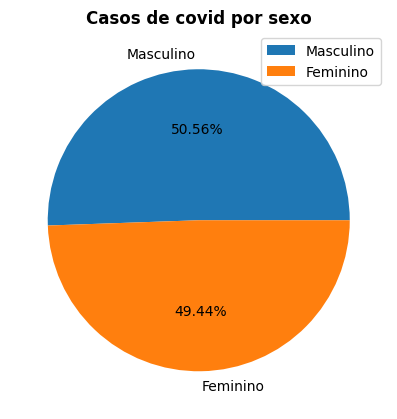

In [100]:
Masculino = df.loc[df["SEXO"]=="Feminino"].count()[0]
Feminino = df.loc[df["SEXO"]=="Masculino"].count()[0]
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Masculino", "Feminino"]

plt.pie([Masculino, Feminino], labels = labels, autopct = "%0.2f%%")
plt.title("Casos de covid por sexo", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

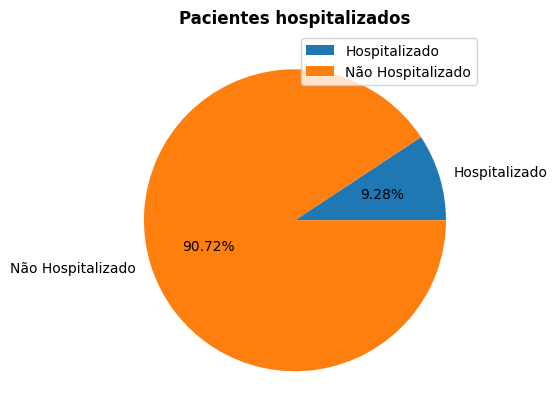

In [101]:
sHospitalizacao = df.loc[df["HOSPITALIZADO"]=="SIM"].count()[0]
nHospitalizacao = df.loc[df["HOSPITALIZADO"]=="NAO"].count()[0]
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Hospitalizado", "Não Hospitalizado"]

plt.pie([sHospitalizacao, nHospitalizacao], labels = labels, autopct = "%0.2f%%")
plt.title("Pacientes hospitalizados", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

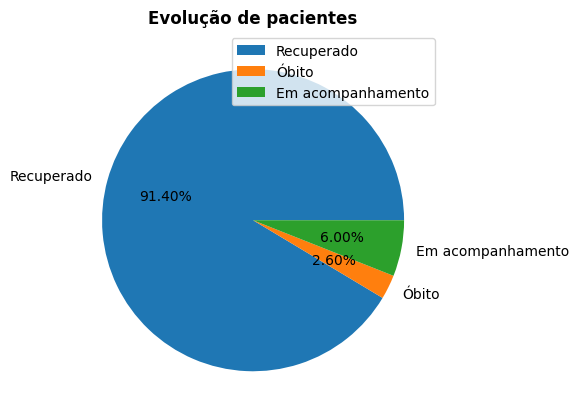

In [102]:
recuperado = df.loc[df["EVOLUCAO"]=="RECUPERADO"].count()[0]
obito = df.loc[df["EVOLUCAO"]=="OBITO"].count()[0]
acompanhamento = df.loc[df["EVOLUCAO"]=="EM ACOMPANHAMENTO"].count()[0]

plt.figure(figsize = [5,5], dpi = 100)
labels = ["Recuperado", "Óbito", "Em acompanhamento"]

plt.pie([recuperado, obito, acompanhamento], labels = labels, autopct = "%0.2f%%")
plt.title("Evolução de pacientes", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

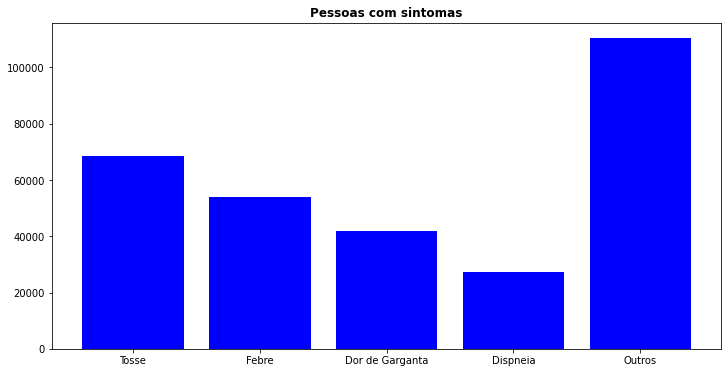

In [103]:
sTosse = df.loc[df["TOSSE"]=="SIM"].count()[0]
sFebre = df.loc[df["FEBRE"]=="SIM"].count()[0]
sGarganta = df.loc[df["GARGANTA"]=="SIM"].count()[0]
sDispneia = df.loc[df["DISPNEIA"]=="SIM"].count()[0]
sOutros = df.loc[df["OUTROS"]=="SIM"].count()[0]
sintomas = [sTosse, sFebre, sGarganta, sDispneia, sOutros]
sintomasKeys = ['Tosse', 'Febre', 'Dor de Garganta', 'Dispneia', 'Outros']
popPos = np.arange(len(sintomas))
ite = [i for i in sintomasKeys]
plt.figure(figsize=(12, 6))
plt.xticks(popPos, ite)
plt.title("Pessoas com sintomas", fontdict = {"fontweight": "bold"})
fig = plt.bar(popPos, sintomas, align='center', color='blue')
plt.show(fig)

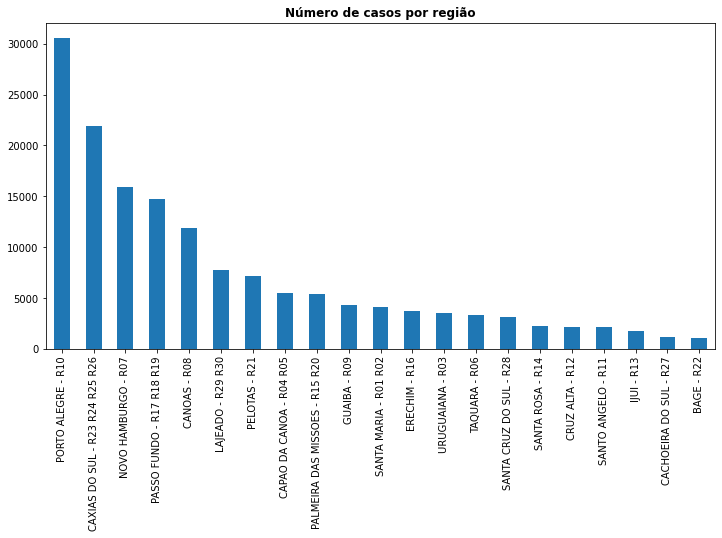

In [104]:
plt.figure(figsize=(12, 6))
plt.title("Número de casos por região", fontdict = {"fontweight": "bold"})
fig = df['REGIAO_COVID'].value_counts().plot.bar()
plt.show(fig)

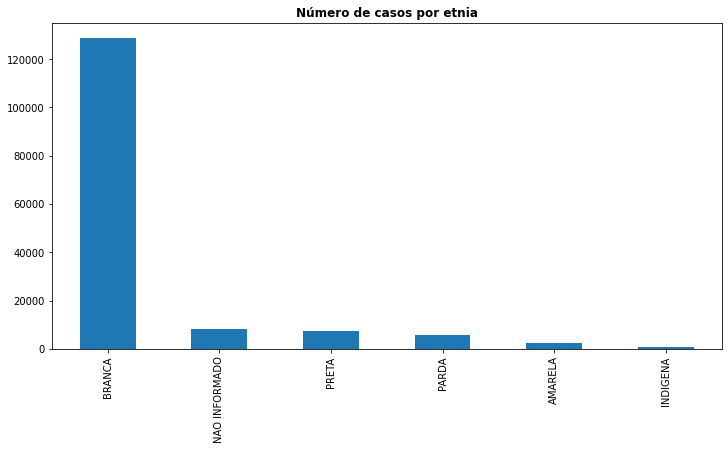

In [105]:
plt.figure(figsize=(12, 6))
plt.title("Número de casos por etnia", fontdict = {"fontweight": "bold"})
fig = df['RACA_COR'].value_counts().plot.bar()
plt.show(fig)

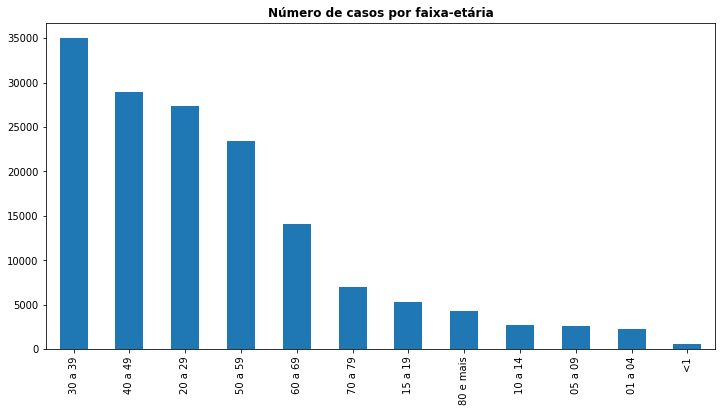

In [106]:
plt.figure(figsize=(12, 6))
plt.title("Número de casos por faixa-etária", fontdict = {"fontweight": "bold"})
fig = df['FAIXAETARIA'].value_counts().plot.bar()
plt.show(fig)